# MedCost: EDA
## Getting Started


The aim of this analysis is to investigate a range of health-related factors and their interconnections to predict individual medical costs billed by health insurance accurately. These factors include aspects such as age, gender, body mass index (BMI), number of children, smoking status, and region. This comprehensive examination will not only provide insights into the patterns and trends in health insurance charges but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence the cost of health insurance, crucial knowledge for improving insurance policy design and outcomes in this increasingly critical area of healthcare.

### Domain Knowledge


Age: Age is a significant factor in health insurance as older individuals are generally at a higher risk of health issues compared to younger individuals. Therefore, age often correlates with higher insurance charges.

Sex: Gender can play a role in health insurance costs. Some studies suggest that women tend to use more health care services, especially during childbearing years. However, the impact of gender on health insurance charges can vary depending on other factors.

BMI (Body Mass Index): BMI is a measure that attempts to quantify an individual's tissue mass. It's widely used as a simple method to assess whether a person has a healthy body weight for a given height. High BMI values are often associated with higher risk of chronic diseases like heart disease, diabetes, and certain types of cancer, which can lead to higher health care costs.

Children: The number of dependents a person has can influence health insurance costs. More dependents usually mean higher insurance charges because more individuals are covered under the same plan.

Smoker: Smoking is a significant risk factor for many health conditions, including heart disease, stroke, and cancer. Smokers often face higher health insurance charges due to these increased health risks.

Region: The region where the beneficiary lives can also affect health insurance charges. This could be due to variations in cost of living, health care costs, and health behaviors across different regions.

Charges: This is the individual medical costs billed by health insurance. It's the dependent variable in this dataset, and it's influenced by all the other factors. Understanding the relationships between the independent variables (age, sex, bmi, children, smoker, region) and charges is the main goal of this analysis.



✔️ These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's medical costs.



In [197]:
# MedCost: EDA
# Downloading the Data 
Data_url='https://www.kaggle.com/datasets/mirichoi0218/insurance'

In [198]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import numpy as np

### Read the input data file form the specified location


In [199]:
medical_df=pd.read_csv(r'insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Our objective
Find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [200]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

In [201]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization


In [202]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1. Age

In [204]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Age is a numeric column. 
1. The minimum age in the dataset is 18 and the maximum age is 64. 
2. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. 

We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

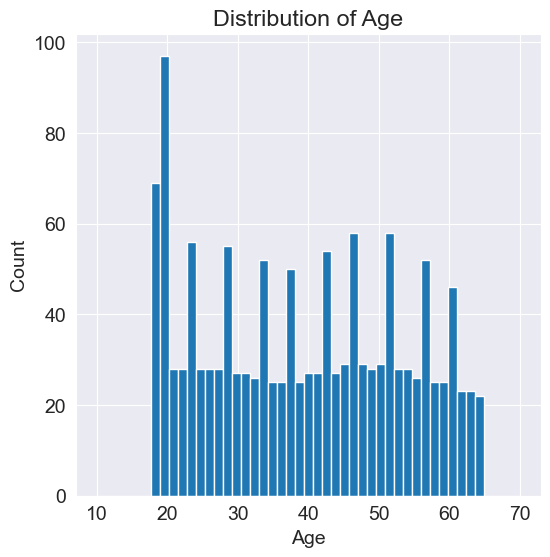

In [205]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.hist(x=medical_df['age'],bins=47,range=(10,70))
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

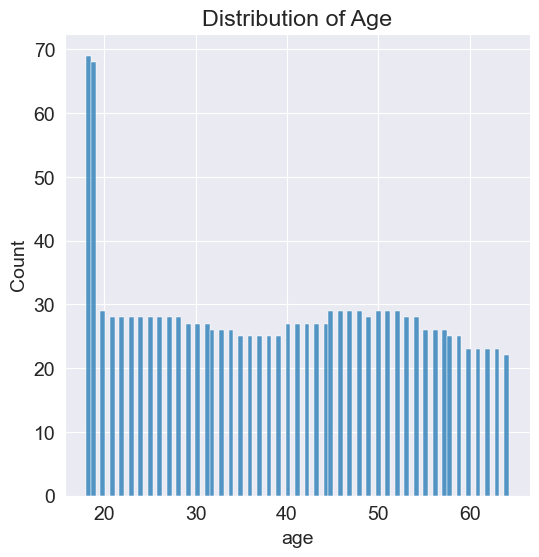

In [206]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='age',bins=47,binwidth=.52,legend=True)
plt.title("Distribution of Age")
plt.show()

### 2. Body Mass Index

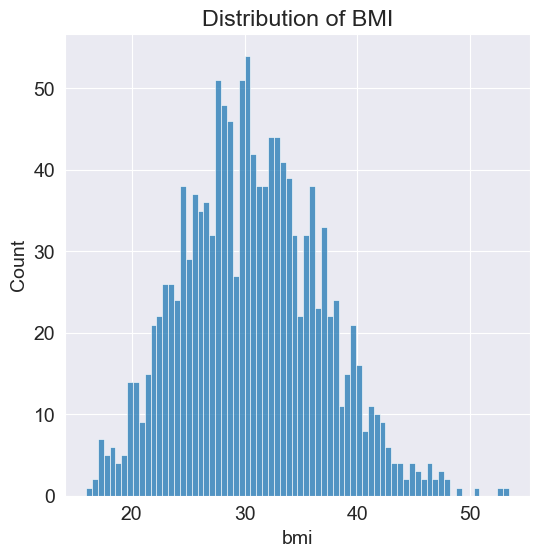

In [207]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='bmi',bins=47,binwidth=.52,legend=True)
plt.title("Distribution of BMI")
plt.show()

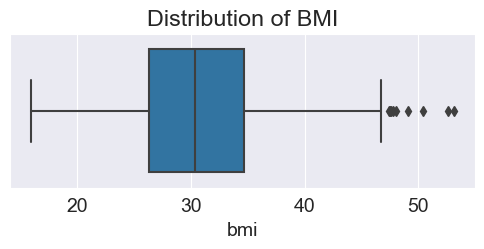

In [208]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxplot(medical_df,x='bmi')
plt.title("Distribution of BMI")
plt.show()

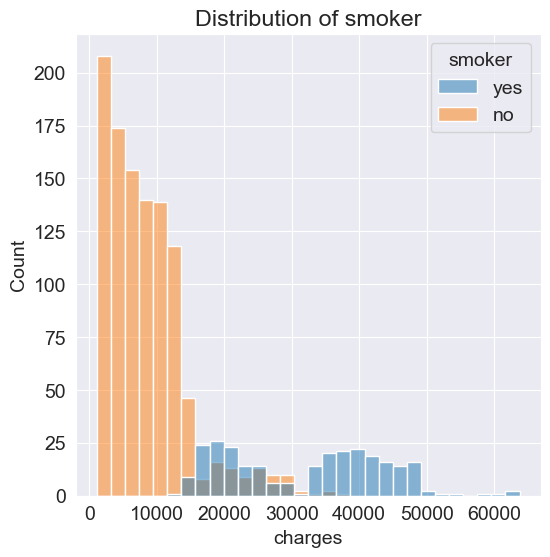

In [209]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='charges',hue='smoker',legend=True)
plt.title("Distribution of smoker")
plt.show()

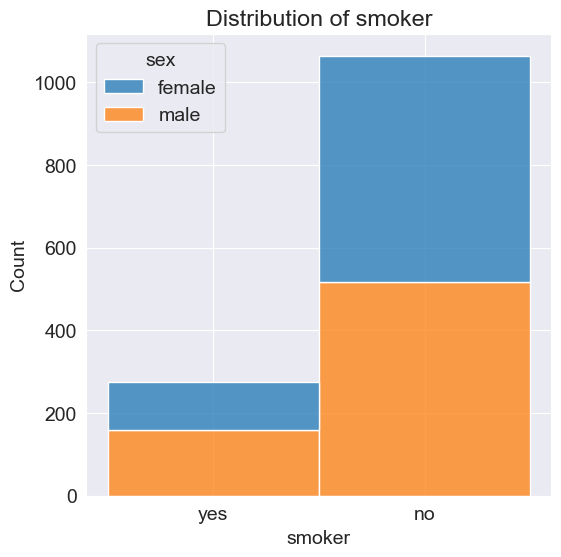

In [210]:
# px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(medical_df,x='smoker',hue='sex',multiple='stack',legend=True)
plt.title("Distribution of smoker")
plt.show()


### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

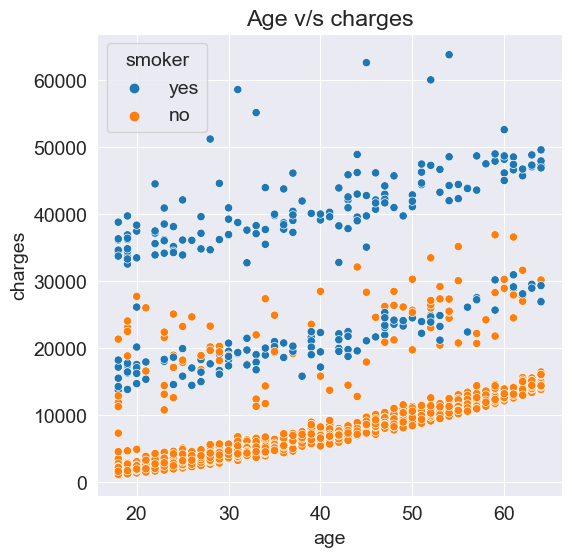

In [211]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(medical_df,y='charges',x='age',hue='smoker')
plt.title("Age v/s charges")
plt.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

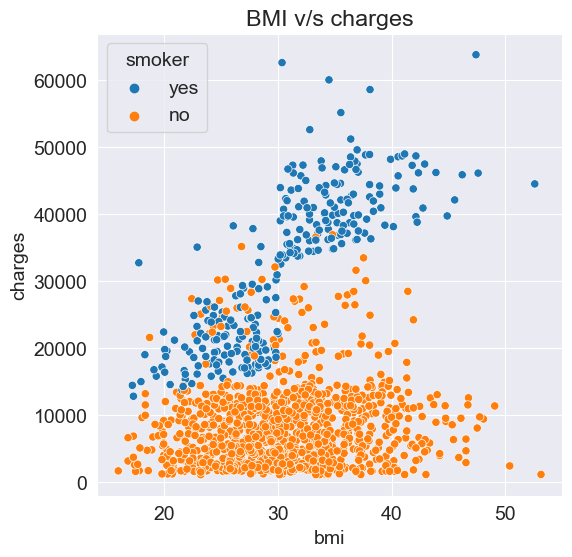

In [212]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(medical_df,y='charges',x='bmi',hue='smoker')
plt.title("BMI v/s charges")
plt.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [213]:
medical_df['charges'].corr(medical_df['age']),medical_df['charges'].corr(medical_df['bmi'])

(0.2990081933306476, 0.19834096883362895)

In [214]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [215]:
medical_df1=medical_df
medical_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [216]:
medical_df1=medical_df1.drop(columns=['sex','region','smoker'])
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [217]:
medical_df1.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


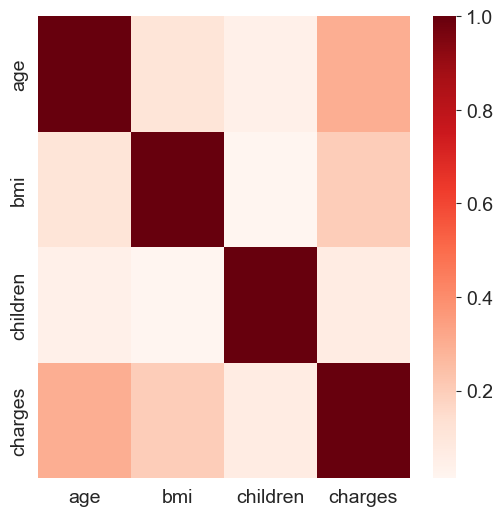

In [218]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(medical_df1.corr(),cmap='Reds',annot=False)
plt.show()

### Correlation vs causation fallacy: 
Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
X and Y can be correlated if X causes Y or if Y causes X, or if both are caused independently by some other factor 
Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that X are Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [221]:
non_smoker_df=medical_df[medical_df['smoker']=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


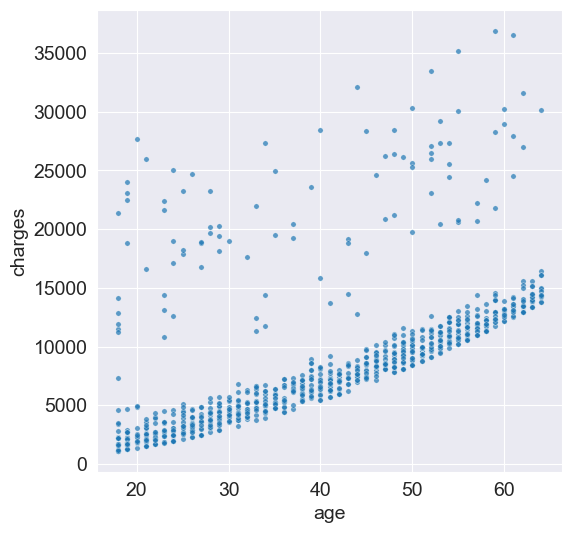

In [223]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=.7,s=15,legend="auto")
plt.show()

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X & Y coordinates has the following formula:
```
y=wx+b
```
The line is characterized two numbers:  w (called "slope") and b (called "intercept").

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

```
charges=w×age+b
```


We'll try determine 
w and b for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers w and b are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute 

```py

def estimate_charges(age, w, b):
    return w * age + b

```

In [225]:
def estimate_charges(age, w, b):
    return w * age + b

In [226]:
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

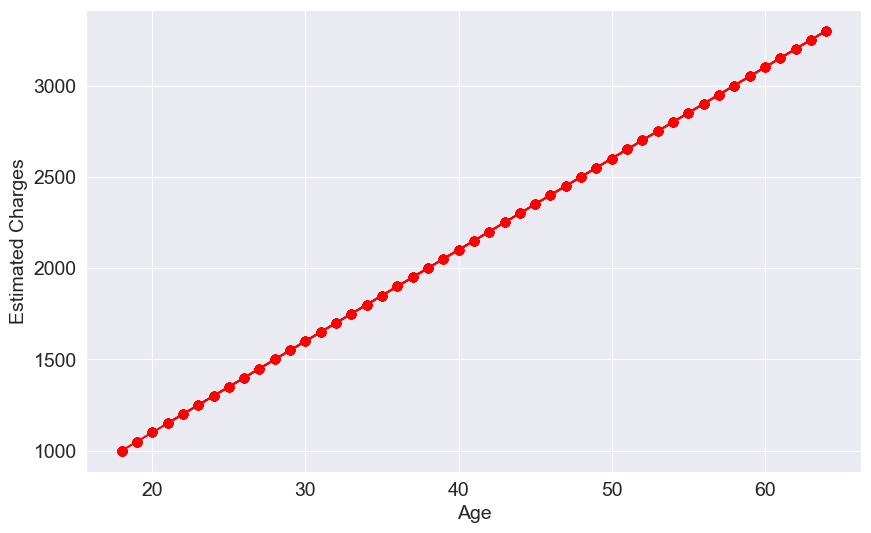

In [228]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.show()

We can overlay this line on the actual data, so see how well our model fits the data.



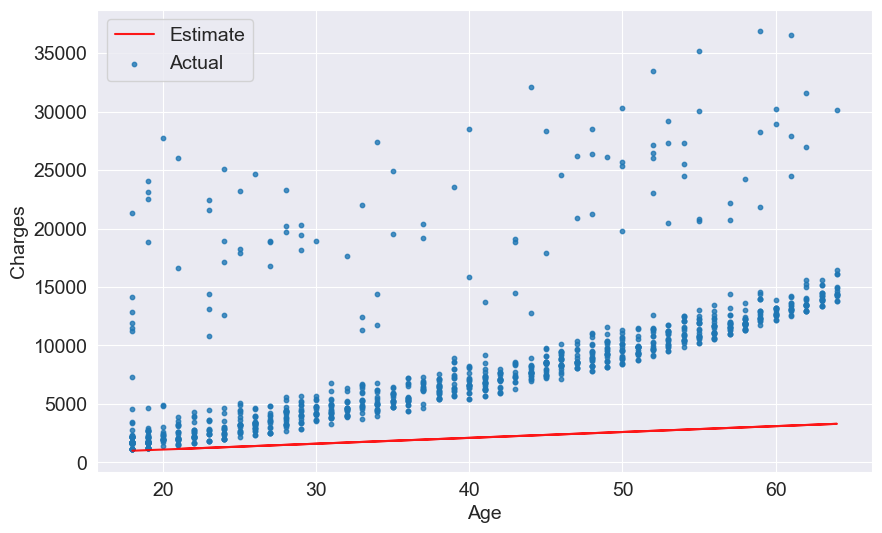

In [233]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=10,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of w and b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [236]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

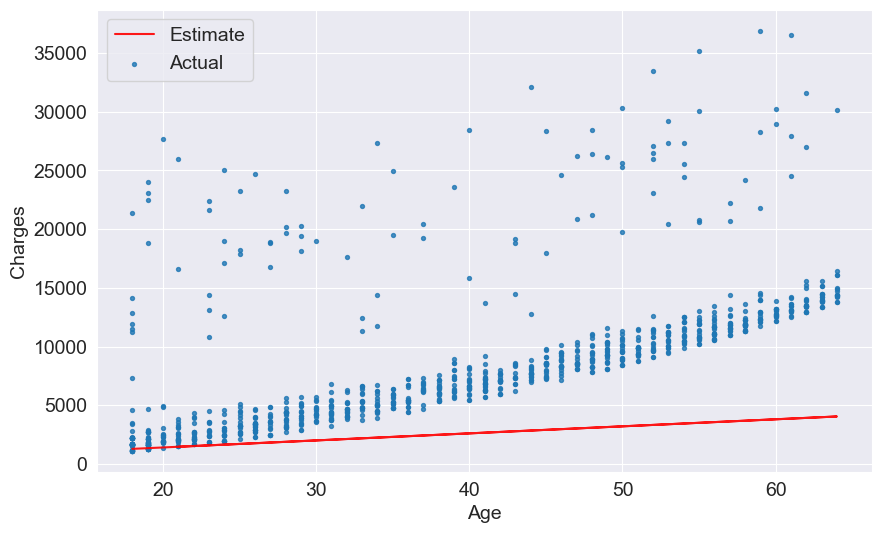

In [237]:
try_parameters(60, 200)

# Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE).

In [238]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [241]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

8461.949562575493

In [242]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


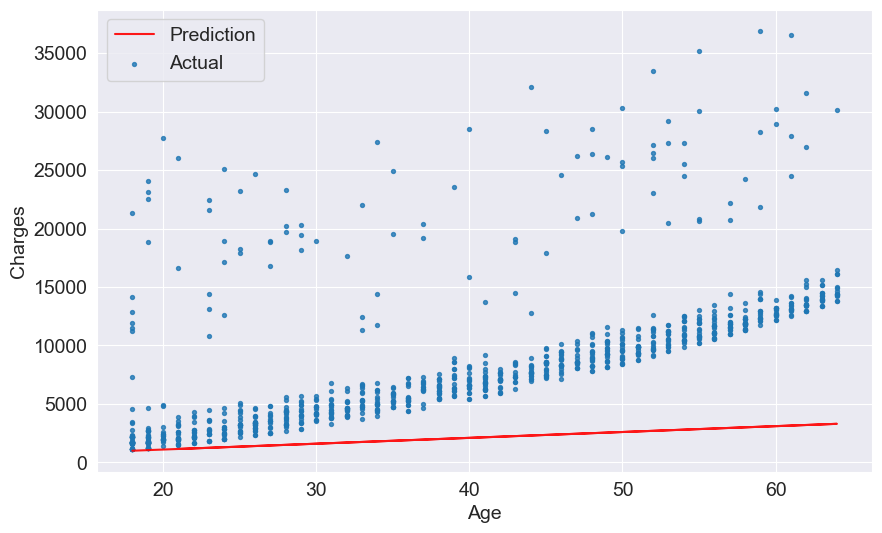

In [243]:

try_parameters(50, 100)

## Linear Regression using Scikit-learn

In [244]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [245]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


### Let's fit the model to the data.


In [247]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61



In [248]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [249]:

predictions = model.predict(inputs)

In [250]:
rmse(targets, predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.



In [251]:
model.coef_,model.intercept_

(array([267.24891283]), -2091.4205565650864)

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.



RMSE Loss:  4662.505766636395


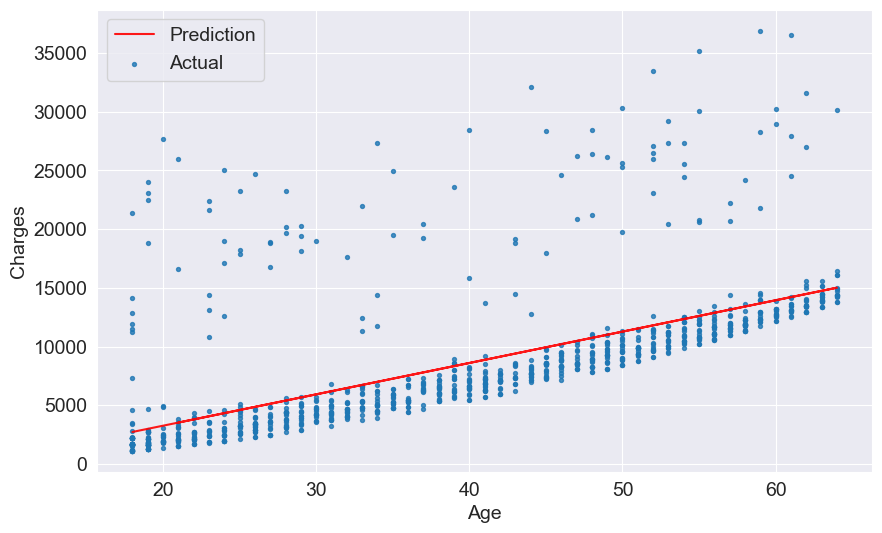

In [252]:
try_parameters(model.coef_, model.intercept_)

# Machine Learning

Congratulations, you've just trained your first machine learning model! Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. Model

2. Cost Function

3. Optimizer

In [253]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


## Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:


charges=w1 ×age+w2​ ×bmi+b

We need to change just one line of code to include the BMI.

In [254]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [255]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

In [256]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [257]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [258]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning
### Binary Categories
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [261]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [262]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [263]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

We can now use the smoker_df column for linear regression.

In [264]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

Let's try adding the "sex" column as well.

In [270]:
sex_code = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df['sex'].map(sex_code)

In [271]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0


In [272]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [273]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


### One-hot Encoding

In [277]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [278]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [279]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [280]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

In [281]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# Model Improvements
Let's discuss and apply some more improvements to our model.

## Feature Scaling

In [282]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [284]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [288]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [287]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [291]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# Creating a Test Set
Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [296]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5867.071276313238


In [297]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6068.68810490783
